# Assignment 5: K-means

### Names of group members (max 2):
    Boris (Johnson)
    Joe (Biden)

In [8]:
# importing the required modules
%pip install numpy matplotlib #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

Note: you may need to restart the kernel to use updated packages.


## Part 1: Coding and testing the Kmeans algorithm

### Load and Inspect the Data

In [9]:
## the data set for testing

df = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24] ])

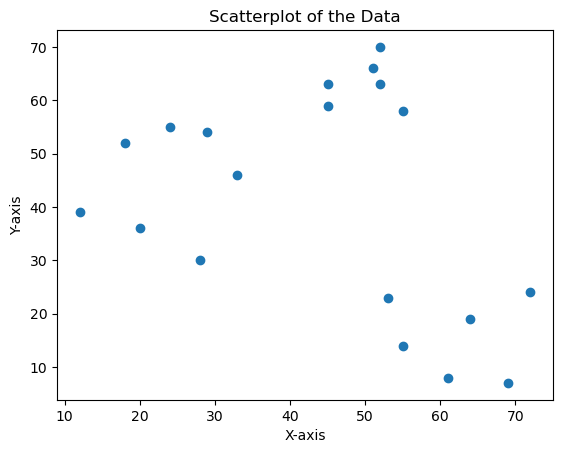

In [10]:
# Quick scatterplot for yourself, can you imagine what the cluster should be?

plt.scatter(df[0], df[1])
plt.title('Scatterplot of the Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


### Method 1. Using Kmeans form package sklearn.

<ul>
    <li> Make a plot function that gives the same colour to data points within one cluster. 
    </li>
    <li> Call KMeans from the package. (Consult the sklearn manual online and figure out how to do it.)
    </li>
    <li> Plot next to the data points also the centres of the clusters ($Z_j$)
    </li>
 </ul>

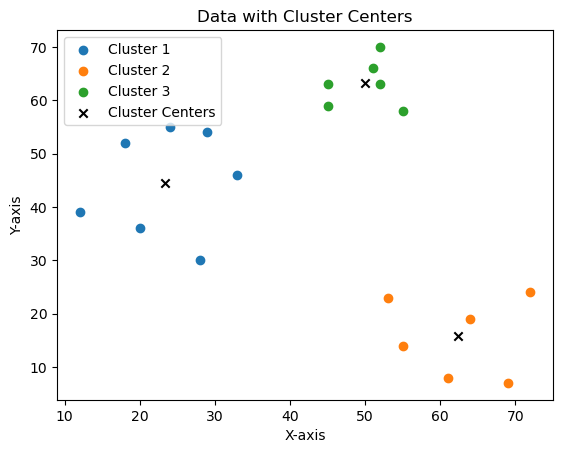

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

def plotclusters(data, k):
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to suppress FutureWarning
    kmeans.fit(data.T)  # Transpose data to match sklearn convention

    # Get cluster labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Plot each cluster with different color
    for i in range(k):
        plt.scatter(data[0, labels==i], data[1, labels==i], label=f'Cluster {i+1}')

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='black', label='Cluster Centers')

    plt.title('Data with Cluster Centers')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

# Test the function
df = np.array([[12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
               [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]])
k = 3  # Number of clusters
plotclusters(df, k)


### Method 2. Code yourself: A heuristic, simple, fast, pretty good algorithm.

<ol>
    <li> Initialization. Choose k random points as centres; plot the data black, the three centers in colour
    </li>
    <li> Function: assigmnent. Compute for every data point the closest centre: assign the data point to that cluster.
    </li>
    <li> Function: replace. Put all centres as the average of the data in their cluster.
    </li>
    <li> Script. Repeat assignment, replace, plotclusters until nothing changes. 
    </li>
 </ol>

In [117]:
## Part 1. Initialization.
def initialize_centers(data, k):
    """
    Randomly initialize k centers from the data points.
    """
    indices = np.random.choice(len(data), k, replace=False)
    centers = data[indices]
    return centers


In [118]:
def assign_clusters(data, centers):
    """
    Assign each data point to the nearest center.
    """
    distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


In [119]:
## Part 3. Function: assigmnent.
def update_centers(data, clusters, k):
    """
    Update the centers based on the mean of the points in each cluster.
    """
    new_centers = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_centers[i] = np.mean(data[clusters == i], axis=0)
    return new_centers



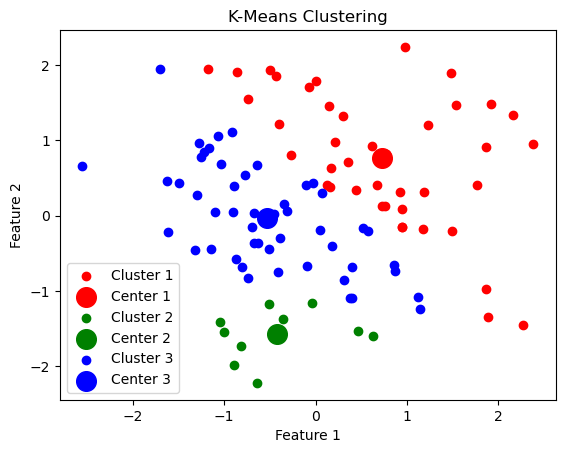

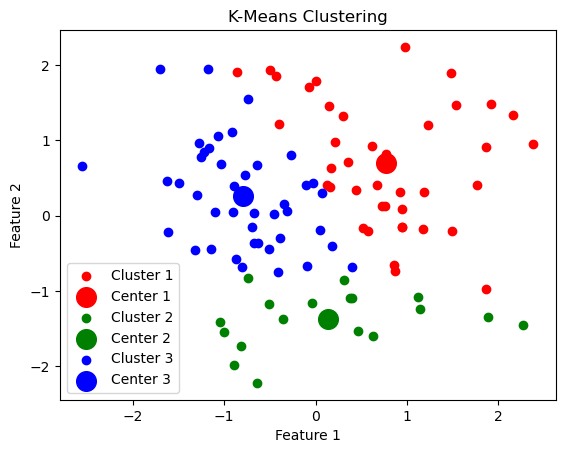

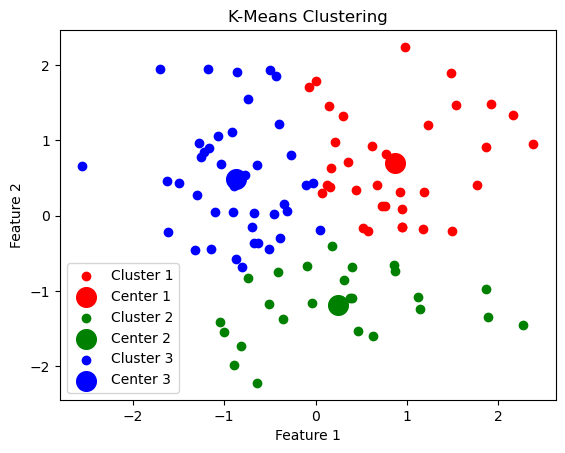

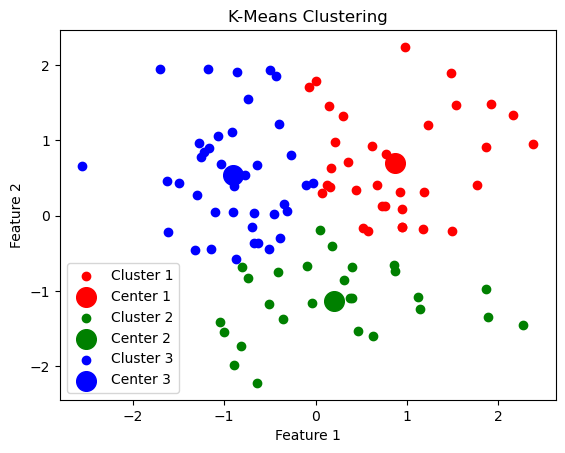

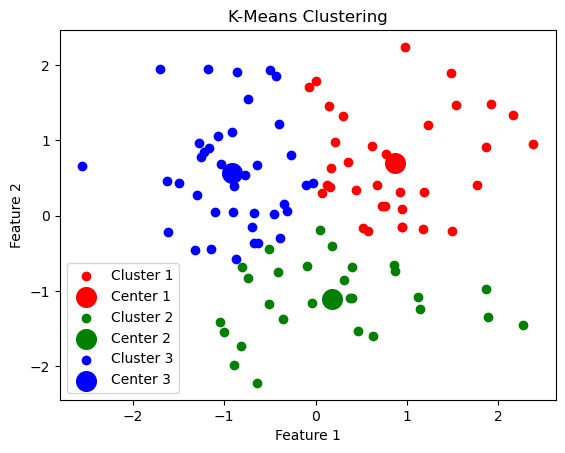

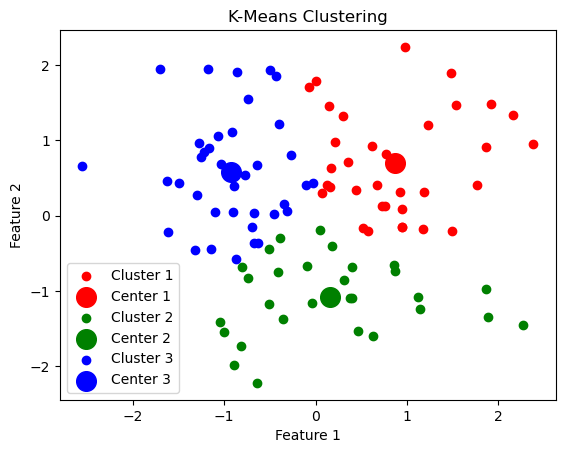

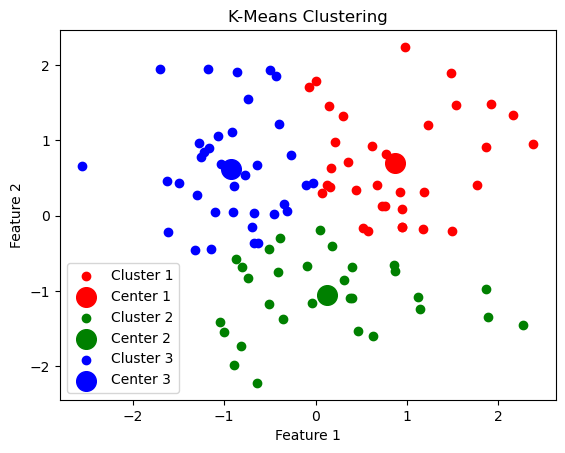

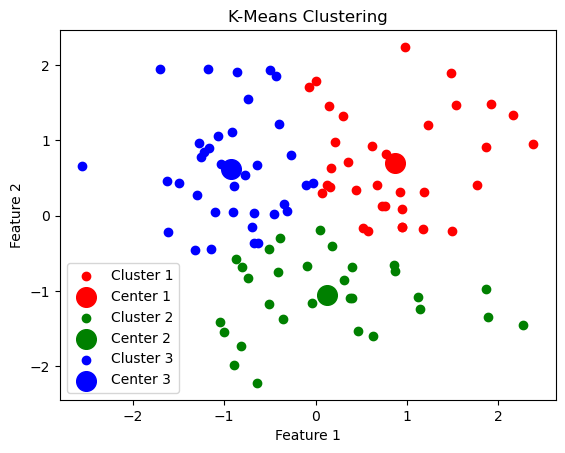

In [123]:
def plot_clusters(data, centers, clusters):
    """
    Plot the data points and centers with different colors for each cluster.
    """
    plt.figure()
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # add more colors if needed
    for i in range(len(centers)):
        plt.scatter(data[clusters == i][:, 0], data[clusters == i][:, 1], color=colors[i], label=f'Cluster {i+1}')
        plt.scatter(centers[i][0], centers[i][1], color=colors[i], marker='o', s=200, label=f'Center {i+1}')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

def k_means(data, k):
    """
    Perform K-means clustering on the given data with k clusters.
    """
    centers = initialize_centers(data, k)
    old_centers = np.zeros_like(centers)
    clusters = np.zeros(len(data))
    
    while not np.array_equal(old_centers, centers):
        clusters = assign_clusters(data, centers)
        old_centers = centers.copy()
        centers = update_centers(data, clusters, k)
        plot_clusters(data, centers, clusters)
    
    return clusters, centers

# Example usage:
if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(0)
    data = np.random.randn(100, 2)
    
    # Define the number of clusters
    k = 3
    
    # Perform K-means clustering
    clusters, centers = k_means(data, k)

# Part 2: Apply Kmeans to Wines database
    
### Let's start by thanking the creators of the dataset that we will be using:

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## Loading and Inspecting the Data

In [115]:
# importing the required modules
%pip install numpy matplotlib seaborn pandas scikit-learn #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 
import pandas as pd
import seaborn as sns

rwine = pd.read_csv('winequality-red.csv', sep=';')  # Makes Pandas objects
wwine = pd.read_csv('winequality-white.csv', sep=';') 

Note: you may need to restart the kernel to use updated packages.


In [100]:
# You may analyse the dataset of the wine of your choosing (red or white):
wines = wwine.sample(frac = 1)


# We just drop the 'quality' from the dataset:
wines_noquality=wines.drop('quality', axis=1)
# the number of samples M in the total combined set is still the same
M = len(wines_noquality)
# the number of features N (excluding the bias) are now all (excluding f='quality'):
N =  wines_noquality.shape[1]
wines_noquality.head() # We will use everything you see here.
X=np.zeros((M,N))
X[0:M,0:N]=wines_noquality[:][0:M]
print(X
     )

[[ 6.4    0.125  0.29  ...  3.23   0.32  12.   ]
 [ 8.     0.22   0.42  ...  3.21   0.69   8.6  ]
 [ 5.2    0.185  0.22  ...  3.55   0.44  10.15 ]
 ...
 [ 6.6    0.27   0.32  ...  3.11   0.56  12.25 ]
 [ 5.2    0.34   0.37  ...  3.25   0.41  12.5  ]
 [ 6.6    0.39   0.38  ...  3.3    0.57   9.4  ]]


### Prepare the data and reduce the dimensionelity of the feature space

<ol>
    <li>Feature scaling of all features in the database</li>
    <li>Do a Principle Component Analysis (PCA)</li>
    <li>Reduce the dimensionality of the feature space to 2 by projecting your samples along the first 2 principle component vector</li>
    <li>Plot your samples as a scatter plot in 2d</li>
    </ol>

In [101]:
# Step 1: feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wines_noquality)

In [102]:
# Step 2: PCA analyis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)



In [103]:
# Step 3: Project samples along PCA directions
PC1 = principal_components[:, 0]
PC2 = principal_components[:, 1]

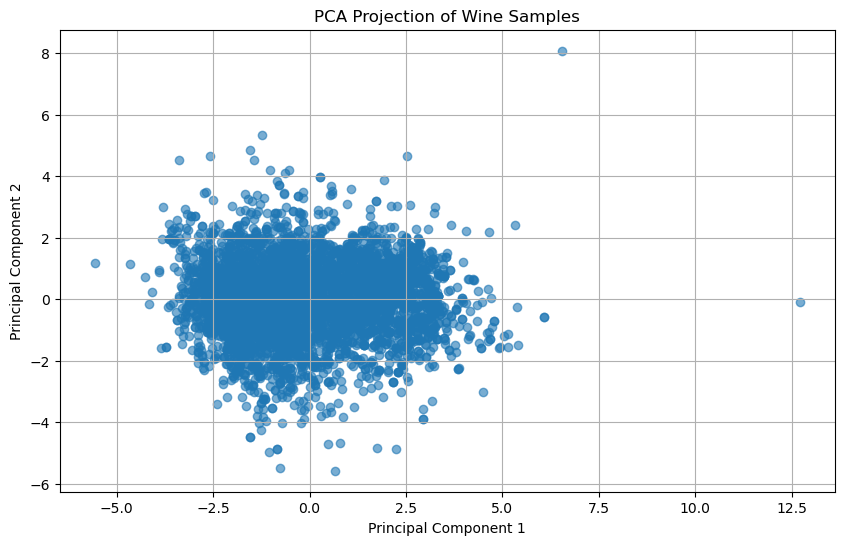

In [104]:
# Step 4: Scatterplot of sample in 2d plane spanned by the first 2 PCA vectors
plt.figure(figsize=(10, 6))
plt.scatter(PC1, PC2, alpha=0.6)
plt.title('PCA Projection of Wine Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

### Kmeans cluster analysis in the plane spanned by the first 2 PCA vectors

<ol>
    <li>Do Kmeans clustering with either method 1 or method 2</li>
    <li>As a function of the number of centroids, plot the average distance of each sample to its centroid </li>
    <li>Determine a sensible number of clusters and explain why. You could try the 'elbow method'. What is the problem with not knowing the number of clusters? </li>
    <li>Plot the clusters in a scatterpot with different colors</li>
</ol>

In [105]:
# Step 1:  Kmeans clustering 
num_clusters = range(1, 10)  # Try different numbers of clusters
average_distances = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10)  # You can adjust the value of n_init as needed
    kmeans.fit(principal_components)
    average_distances.append(np.mean(np.min(kmeans.transform(principal_components), axis=1)))


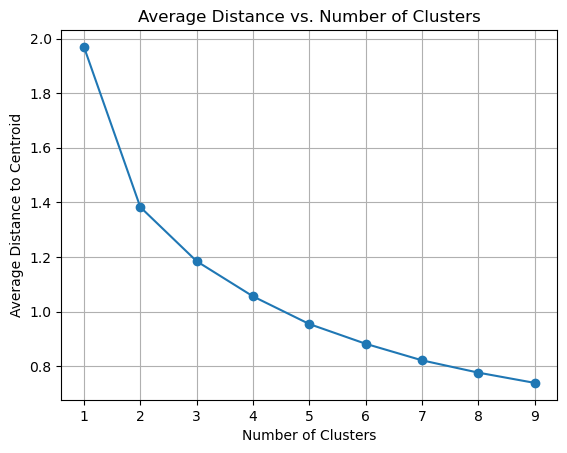

In [106]:
# Step 2:  Average distance to the k centroids
plt.plot(num_clusters, average_distances, marker='o')
plt.title('Average Distance vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance to Centroid')
plt.grid(True)
plt.show()


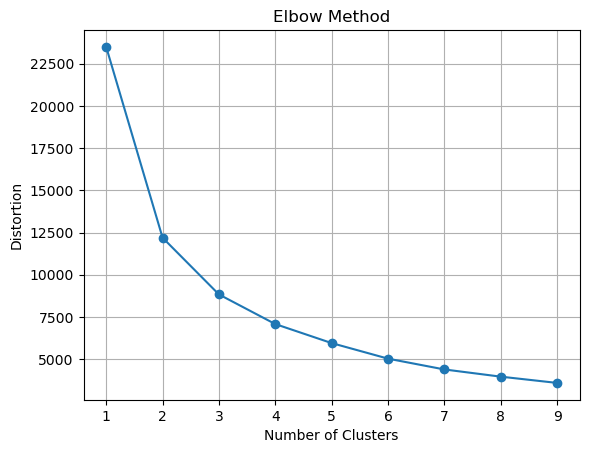

In [107]:
# Step 3: Determine optimal k value
distortions = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(principal_components)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

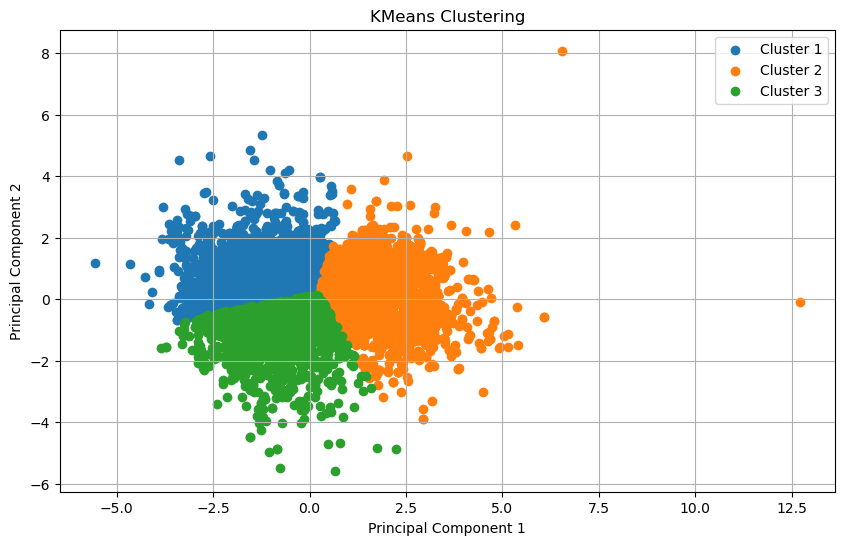

In [108]:
optimal_num_clusters = 3  # Adjust based on the elbow method or other criteria
kmeans = KMeans(n_clusters=optimal_num_clusters, n_init=10)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Plot the clusters in a scatter plot with different colors
plt.figure(figsize=(10, 6))
for i in range(optimal_num_clusters):
    plt.scatter(PC1[cluster_labels == i], PC2[cluster_labels == i], label=f'Cluster {i+1}')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()